In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [118]:
orig_df = pd.read_csv("all_province_full.csv")
orig_df.head()

,province,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN_2017,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,...,2941461.0,1480719,925266.0,16115.466670,37906.6,149990,79.4668,69209858,99.625031,8006265.2
1,UDON THANI_2017,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,...,2270322.0,3869166,614978.0,15926.733330,37906.6,149990,79.4668,69209858,99.625031,8006265.2
2,LOEI_2017,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,...,1145446.0,2713946,314355.0,6644.266667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
3,NONG KHAI_2017,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,...,1281165.0,1133236,212400.0,3647.466667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
4,MUKDAHAN_2017,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,...,657777.0,1289197,196184.0,3807.000000,37906.6,149990,79.4668,69209858,99.625031,8006265.2


In [119]:
orig_df.describe()

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,231.00000,231.000000,231.000000,2.310000e+02,231.000000,2.310000e+02
mean,2.818182,2.792208,2.350649,2.168831,2.324675,16820.987410,5207.154841,54213.740247,5159.640693,824.904762,...,2.390313e+06,1.891379e+06,5.099046e+05,9652.725289,37932.00000,149990.000000,79.466800,6.920324e+07,100.052307,7.888423e+06
std,1.329210,1.560415,1.206139,1.202200,1.064546,11607.970019,29875.575751,116261.739896,12482.985411,2702.348846,...,5.558296e+06,1.389652e+06,6.315406e+05,11285.301234,91.31035,5294.204625,0.016038,1.871124e+05,0.503472,2.429356e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,2413.932239,0.000000,648.396626,124.349588,26.000000,...,1.725660e+05,1.094060e+05,7.559077e+04,1381.000000,37835.30000,143520.000000,79.447200,6.897133e+07,99.625031,7.550704e+06
25%,2.000000,1.000000,2.000000,1.000000,1.000000,8536.580138,143.466967,4142.994817,517.971199,122.500000,...,5.785240e+05,9.207150e+05,2.414765e+05,4188.648925,37835.30000,143520.000000,79.447200,6.897133e+07,99.625031,7.550704e+06
50%,3.000000,3.000000,2.000000,2.000000,2.000000,13901.405230,395.463234,7879.749099,1129.134655,209.000000,...,9.515510e+05,1.668311e+06,3.909477e+05,7240.358898,37906.60000,149990.000000,79.466800,6.920986e+07,99.774361,8.006265e+06
75%,4.000000,4.000000,3.000000,3.000000,3.000000,20722.628870,1579.532881,30045.849920,2767.505692,561.000000,...,1.793411e+06,2.674452e+06,5.584610e+05,11509.365620,38054.10000,156460.000000,79.486400,6.942852e+07,100.757530,8.108300e+06
max,5.000000,6.000000,5.000000,5.000000,4.000000,77846.992940,281799.846300,622671.598400,83220.164170,25574.000000,...,4.801920e+07,8.386293e+06,5.844446e+06,95660.600000,38054.10000,156460.000000,79.486400,6.942852e+07,100.757530,8.108300e+06


In [120]:
orig_df.columns

Index(['province', 'Format1', 'Format2', 'Format3', 'Format4', 'Format5',
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'debt

In [121]:
df = orig_df
df.head()

,province,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN_2017,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,...,2941461.0,1480719,925266.0,16115.466670,37906.6,149990,79.4668,69209858,99.625031,8006265.2
1,UDON THANI_2017,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,...,2270322.0,3869166,614978.0,15926.733330,37906.6,149990,79.4668,69209858,99.625031,8006265.2
2,LOEI_2017,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,...,1145446.0,2713946,314355.0,6644.266667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
3,NONG KHAI_2017,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,...,1281165.0,1133236,212400.0,3647.466667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
4,MUKDAHAN_2017,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,...,657777.0,1289197,196184.0,3807.000000,37906.6,149990,79.4668,69209858,99.625031,8006265.2


In [122]:
df = df.drop(['province'], axis=1)
df

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,845,...,2941461.0,1480719,9.252660e+05,16115.466670,37906.6,149990,79.4668,69209858,99.625031,8006265.2
1,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,561,...,2270322.0,3869166,6.149780e+05,15926.733330,37906.6,149990,79.4668,69209858,99.625031,8006265.2
2,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,186,...,1145446.0,2713946,3.143550e+05,6644.266667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
3,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,111,...,1281165.0,1133236,2.124000e+05,3647.466667,37906.6,149990,79.4668,69209858,99.625031,8006265.2
4,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,133,...,657777.0,1289197,1.961840e+05,3807.000000,37906.6,149990,79.4668,69209858,99.625031,8006265.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5,5,2,5,4,2992.031993,7.878722,291876.560800,15972.097790,2537,...,1037246.0,212038,1.488496e+06,17193.613110,38054.1,143520,79.4864,68971331,100.757530,7550704.1
227,5,6,2,4,4,5789.250519,132.666192,185025.287000,9545.870133,2427,...,679015.0,510375,1.164412e+06,10650.580060,38054.1,143520,79.4864,68971331,100.757530,7550704.1
228,4,5,2,4,4,14103.585590,764.224076,236940.839100,8386.459823,2703,...,786698.0,184861,6.963281e+05,16885.595590,38054.1,143520,79.4864,68971331,100.757530,7550704.1
229,4,5,2,4,3,21312.922530,2119.227800,167758.182400,4636.181046,1294,...,1413480.0,920808,3.820312e+05,8359.685620,38054.1,143520,79.4864,68971331,100.757530,7550704.1


In [123]:
df_train, df_test = train_test_split(df, test_size=1/3, shuffle=False)
X_train = df_train[['Information and communication', 'Financial and insurance activities',
                    'Construction',
                    'Human health activities', 'Other service activities'
                   , 'Wholesale and retail trade and repair of motor vehicles'
                   ]]
y_train = df_train['Format1']
X_test = df_test[['Information and communication', 'Financial and insurance activities',
                    'Construction',
                    'Human health activities', 'Other service activities'
                   , 'Wholesale and retail trade and repair of motor vehicles']]
y_test = df_test['Format1']

In [124]:
# scaler = StandardScaler()
# array_normalized = scaler.fit_transform(df_train)
# df_normalized = pd.DataFrame(array_normalized)
# df_normalized.head()

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.00,0.8,0.50,0.75,1.000000,0.256425,0.003345,0.112617,0.032322,0.032057,...,0.057870,0.165680,0.147287,0.156285,0.325868,0.5,0.5,0.521721,0.0,0.81701
1,0.75,0.8,0.50,0.50,1.000000,0.227137,0.013714,0.023224,0.016522,0.020941,...,0.043843,0.454248,0.093500,0.154283,0.325868,0.5,0.5,0.521721,0.0,0.81701
2,0.25,0.2,0.25,0.25,0.000000,0.161651,0.004879,0.010878,0.004665,0.006263,...,0.020333,0.314676,0.041388,0.055826,0.325868,0.5,0.5,0.521721,0.0,0.81701
3,0.25,0.2,0.25,0.00,0.333333,0.096221,0.001080,0.009378,0.004044,0.003327,...,0.023170,0.123697,0.023715,0.024040,0.325868,0.5,0.5,0.521721,0.0,0.81701
4,0.00,0.0,0.25,0.00,0.000000,0.060949,0.000326,0.004088,0.002225,0.004188,...,0.010141,0.142540,0.020904,0.025732,0.325868,0.5,0.5,0.521721,0.0,0.81701


In [126]:
random_state_val = 0

In [127]:
model=DecisionTreeClassifier(random_state=random_state_val)
model=model.fit(X_train,y_train)

[Text(217.62000000000003, 203.85, 'X[0] <= 820.795\ngini = 0.792\nsamples = 154\nvalue = [30, 40, 34, 28, 22]'),
 Text(133.92000000000002, 176.67000000000002, 'X[1] <= 3473.0\ngini = 0.674\nsamples = 106\nvalue = [30, 40, 34, 2, 0]'),
 Text(66.96000000000001, 149.49, 'X[2] <= 1344.5\ngini = 0.514\nsamples = 64\nvalue = [30, 33, 1, 0, 0]'),
 Text(33.480000000000004, 122.31, 'X[5] <= 5074.5\ngini = 0.137\nsamples = 27\nvalue = [25, 2, 0, 0, 0]'),
 Text(16.740000000000002, 95.13, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0, 0, 0]'),
 Text(50.220000000000006, 95.13, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(100.44000000000001, 122.31, 'X[1] <= 1618.0\ngini = 0.279\nsamples = 37\nvalue = [5, 31, 1, 0, 0]'),
 Text(83.70000000000002, 95.13, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(117.18, 95.13, 'X[5] <= 20624.5\ngini = 0.207\nsamples = 35\nvalue = [3, 31, 1, 0, 0]'),
 Text(100.44000000000001, 67.94999999999999, 'X[2] <= 2457.5\ngini = 0.161\nsamples = 34\n

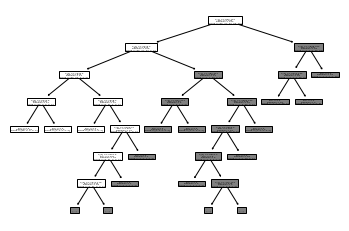

In [128]:
tree.plot_tree(model, max_depth=6) 

In [151]:
y_predicted = model.predict(X_test)
y_predicted

array([5, 4, 2, 2, 1, 1, 3, 2, 5, 2, 1, 4, 3, 3, 3, 3, 3, 1, 1, 1, 5, 3,
       2, 1, 3, 2, 2, 2, 2, 4, 3, 2, 1, 2, 2, 2, 3, 5, 4, 1, 1, 1, 3, 4,
       5, 1, 2, 3, 2, 2, 2, 5, 4, 5, 1, 3, 1, 3, 2, 4, 3, 4, 3, 3, 1, 3,
       1, 1, 1, 3, 4, 5, 5, 5, 4, 4, 5], dtype=int64)

In [130]:
y_predicted[70]

4

In [131]:
print(confusion_matrix(y_test,y_predicted))

[[15  0  0  0  0]
 [ 2 18  0  0  0]
 [ 1  0 16  0  0]
 [ 0  0  3 11  0]
 [ 0  0  0  0 11]]


In [132]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       1.00      0.90      0.95        20
           3       0.84      0.94      0.89        17
           4       1.00      0.79      0.88        14
           5       1.00      1.00      1.00        11

    accuracy                           0.92        77
   macro avg       0.94      0.93      0.93        77
weighted avg       0.93      0.92      0.92        77



In [133]:
x_check = pd.DataFrame(columns = ['Information and communication', 'Financial and insurance activities',
                    'Construction',
                    'Human health activities', 'Other service activities'
                   , 'Wholesale and retail trade and repair of motor vehicles'])
#x_check.loc[1] = [19547.5655,3864.499443,15094.45507,1497.257873,561,4566,16201,3576.283013,1635.303048,1155.625497,8968,5494,58,917,7076,13664,3824.106741,209.048201,1474.87228,1273,2270322,3869166,614978,15926.73333,37906.6,149990,79.4668,69209858,99.62503052,8006265.2]
#x_check

# Clustering

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [227]:
orig_df = pd.read_csv('data_cluster.csv')
orig_df.head()

,Unnamed: 0,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
0,KHON KAEN,5,5,3,4,4,20935.090040,1206.373717,68848.554780,2746.279637,...,3408096,841104,942538.91110,17193.613110,38054.1,143520,79.4864,68971331,100.75753,7550704.1
1,UDON THANI,4,5,3,3,4,18152.075400,6211.990349,14403.956680,1446.947377,...,2559064,3869096,700992.56110,15151.681540,38054.1,143520,79.4864,68971331,100.75753,7550704.1
2,LOEI,2,2,2,2,1,13253.341290,1084.257727,5738.331029,510.443508,...,1274374,2713094,339243.06110,6435.578733,38054.1,143520,79.4864,68971331,100.75753,7550704.1
3,NONG KHAI,2,2,2,1,2,9377.362409,177.441005,6145.417423,439.440877,...,1312482,1132879,87527.96667,1924.393939,38054.1,143520,79.4864,68971331,100.75753,7550704.1
4,MUKDAHAN,1,1,2,1,1,6535.465990,135.829909,3329.313682,303.240067,...,716602,1288544,188990.07220,3821.712397,38054.1,143520,79.4864,68971331,100.75753,7550704.1


<AxesSubplot:>

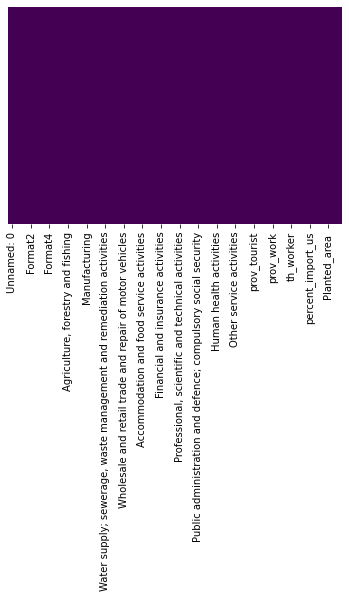

In [228]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [229]:
orig_df.describe()

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,prov_tourist,prov_fram,prov_work,prov_birth,th_worker,debt,percent_import_us,population,Planted_area,export
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,7.700000e+01,7.700000e+01,7.700000e+01,77.000000,7.700000e+01,77.0,7.700000e+01,77.0,7.700000e+01,7.700000e+01
mean,2.818182,2.792208,2.350649,2.168831,2.324675,16258.700336,5190.351500,51439.766224,4846.090909,761.415584,...,2.520645e+06,1.890036e+06,5.237834e+05,9520.884327,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
std,1.335027,1.567244,1.211418,1.207461,1.069205,11137.697749,28512.539794,111167.129393,11271.574057,2483.297528,...,5.886666e+06,1.397418e+06,6.843938e+05,11157.179921,5.126569e-11,0.0,1.430404e-13,0.0,2.002566e-13,1.031173e-08
min,1.000000,1.000000,1.000000,1.000000,1.000000,2456.234345,0.000000,648.396626,132.373977,26.000000,...,1.898580e+05,1.097020e+05,7.559077e+04,1458.936088,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
25%,2.000000,1.000000,2.000000,1.000000,1.000000,8125.489355,139.125214,3920.757147,524.724612,104.000000,...,6.364880e+05,9.208080e+05,2.548764e+05,4107.758127,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
50%,3.000000,3.000000,2.000000,2.000000,2.000000,13901.405230,367.769324,7879.749099,1133.269855,197.000000,...,1.016535e+06,1.667852e+06,3.970205e+05,7240.090579,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
75%,4.000000,4.000000,3.000000,3.000000,3.000000,20514.003690,1978.663682,28905.404140,2746.279637,495.000000,...,1.819420e+06,2.674063e+06,5.834849e+05,11226.124630,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06
max,5.000000,6.000000,5.000000,5.000000,4.000000,59945.066990,248717.731000,600999.717200,56565.043730,21202.000000,...,4.801920e+07,8.384561e+06,5.844446e+06,90331.708430,3.805410e+04,143520.0,7.948640e+01,68971331.0,1.007575e+02,7.550704e+06


In [230]:
orig_df.columns

Index(['Unnamed: 0', 'Format1', 'Format2', 'Format3', 'Format4', 'Format5',
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'province_pop', 'prov_tourist', 'prov_fram', 'prov_work', 'prov_birth',
       'th_worker', 'de

In [231]:
df = orig_df[['Information and communication', 'Financial and insurance activities',
                    'Construction',
                    'Human health activities', 'Other service activities'
                   , 'Wholesale and retail trade and repair of motor vehicles']]
df

,Information and communication,Financial and insurance activities,Construction,Human health activities,Other service activities,Wholesale and retail trade and repair of motor vehicles
0,1196.099541,12072,7271,7187.121854,1530.359405,24525
1,937.909456,8839,4787,3633.803053,1369.255841,14378
2,291.752749,3019,1960,1594.808064,425.127118,5995
3,363.492487,2862,1661,1381.981532,619.060097,4779
4,138.529347,1703,1200,871.339373,229.224879,3366
...,...,...,...,...,...,...
72,4546.785332,25565,10409,8766.355076,12979.793240,97576
73,3582.759627,15290,11901,5680.390849,3066.806726,53144
74,2155.632589,8511,7267,4500.496163,1279.988702,47602
75,1936.229475,11159,10547,3820.244886,1338.609211,37786


In [232]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5
0,0.004194,0.016753,0.065577,0.082522,0.010930,0.022613
1,0.003207,0.011939,0.041159,0.038065,0.009709,0.012737
2,0.000736,0.003273,0.013369,0.012554,0.002551,0.004577
3,0.001011,0.003039,0.010430,0.009891,0.004021,0.003394
4,0.000150,0.001313,0.005898,0.003502,0.001066,0.002019


In [233]:
df_normalized.describe()

,0,1,2,3,4,5
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.016382,0.020456,0.044739,0.042555,0.021166,0.026246
std,0.113886,0.113411,0.116421,0.122125,0.114146,0.113888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000662,0.002472,0.010794,0.008945,0.002212,0.003207
50%,0.001350,0.005051,0.019818,0.015647,0.003969,0.006899
75%,0.002910,0.009338,0.041159,0.036877,0.007776,0.014735
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

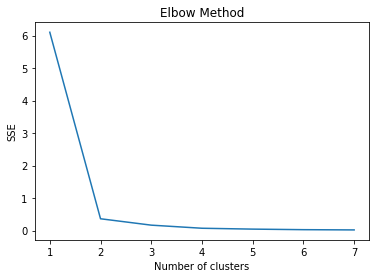

In [234]:
max_k = 8
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [235]:
k = 5

In [236]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=5)

In [243]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

<ipython-input-243-d8e33fd503bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Information and communication,Financial and insurance activities,Construction,Human health activities,Other service activities,Wholesale and retail trade and repair of motor vehicles,cluster_id
0,1196.099541,12072,7271,7187.121854,1530.359405,24525,0
1,937.909456,8839,4787,3633.803053,1369.255841,14378,0
2,291.752749,3019,1960,1594.808064,425.127118,5995,3
3,363.492487,2862,1661,1381.981532,619.060097,4779,3
4,138.529347,1703,1200,871.339373,229.224879,3366,3
...,...,...,...,...,...,...,...
72,4546.785332,25565,10409,8766.355076,12979.793240,97576,4
73,3582.759627,15290,11901,5680.390849,3066.806726,53144,4
74,2155.632589,8511,7267,4500.496163,1279.988702,47602,0
75,1936.229475,11159,10547,3820.244886,1338.609211,37786,0


In [244]:
df.to_csv('cluster_export.csv', index=False) 

In [238]:
df.cluster_id.value_counts()

3    54
0    15
4     6
2     1
1     1
Name: cluster_id, dtype: int64

In [242]:
df

,Information and communication,Financial and insurance activities,Construction,Human health activities,Other service activities,Wholesale and retail trade and repair of motor vehicles,cluster_id
0,1196.099541,12072,7271,7187.121854,1530.359405,24525,0
1,937.909456,8839,4787,3633.803053,1369.255841,14378,0
2,291.752749,3019,1960,1594.808064,425.127118,5995,3
3,363.492487,2862,1661,1381.981532,619.060097,4779,3
4,138.529347,1703,1200,871.339373,229.224879,3366,3
...,...,...,...,...,...,...,...
72,4546.785332,25565,10409,8766.355076,12979.793240,97576,4
73,3582.759627,15290,11901,5680.390849,3066.806726,53144,4
74,2155.632589,8511,7267,4500.496163,1279.988702,47602,0
75,1936.229475,11159,10547,3820.244886,1338.609211,37786,0


In [239]:
df[df.cluster_id == 1]

,Information and communication,Financial and insurance activities,Construction,Human health activities,Other service activities,Wholesale and retail trade and repair of motor vehicles,cluster_id
71,261626.3171,672406,102327,80517.65481,131991.4208,1028711,1


In [240]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.5046352579769027


In [241]:
df[df.cluster_id == 3]

,Information and communication,Financial and insurance activities,Construction,Human health activities,Other service activities,Wholesale and retail trade and repair of motor vehicles,cluster_id
2,291.752749,3019,1960,1594.808064,425.127118,5995,3
3,363.492487,2862,1661,1381.981532,619.060097,4779,3
4,138.529347,1703,1200,871.339373,229.224879,3366,3
5,393.909425,2614,2444,1306.364955,530.519260,5015,3
6,526.696858,4759,2661,1791.169643,677.118703,6975,3
7,287.971493,4517,2651,1632.242579,619.061575,6284,3
9,750.382160,4252,2174,1980.807210,668.044098,7104,3
10,253.175056,2510,1284,1321.414257,446.716976,3152,3
12,378.583643,6801,2688,2699.277607,1098.467243,8560,3
13,436.194124,6491,3122,2404.458945,1114.305449,10629,3


## Hirar

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
%matplotlib inline

In [164]:
df_normalized

,0,1,2,3,4,5
0,0.004194,0.016753,0.065577,0.082522,0.010930,0.022613
1,0.003207,0.011939,0.041159,0.038065,0.009709,0.012737
2,0.000736,0.003273,0.013369,0.012554,0.002551,0.004577
3,0.001011,0.003039,0.010430,0.009891,0.004021,0.003394
4,0.000150,0.001313,0.005898,0.003502,0.001066,0.002019
...,...,...,...,...,...,...
72,0.017006,0.036844,0.096425,0.102281,0.097732,0.093714
73,0.013320,0.021545,0.111091,0.063671,0.022579,0.050468
74,0.007863,0.011451,0.065538,0.048908,0.009032,0.045074
75,0.007024,0.015393,0.097781,0.040397,0.009476,0.035520


In [215]:
# Set up parameter values
linkage_val = 'complete'  # 'others are 'complete', 'single', 'ward' 'average'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None


In [216]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [217]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

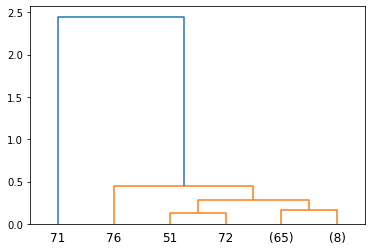

In [218]:
plot_dendrogram(model, truncate_mode='level', p=3)

In [219]:
# Choose the distance threshold from dendrogram
dist_threshold_val = 0.3
nclusters_val = None

In [220]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0.3, linkage='complete',
                        n_clusters=None)

In [221]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2], dtype=int64)

In [222]:
cluster_ids = pd.Series(labels).unique()
cluster_ids

array([0, 1, 2], dtype=int64)

In [223]:
cluster_predictions = model.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.head(10)

<ipython-input-223-ae44bb92dc01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Information and communication,Financial and insurance activities,Construction,Human health activities,Other service activities,Wholesale and retail trade and repair of motor vehicles,cluster_id
0,1196.099541,12072,7271,7187.121854,1530.359405,24525,0
1,937.909456,8839,4787,3633.803053,1369.255841,14378,0
2,291.752749,3019,1960,1594.808064,425.127118,5995,0
3,363.492487,2862,1661,1381.981532,619.060097,4779,0
4,138.529347,1703,1200,871.339373,229.224879,3366,0
5,393.909425,2614,2444,1306.364955,530.519260,5015,0
6,526.696858,4759,2661,1791.169643,677.118703,6975,0
7,287.971493,4517,2651,1632.242579,619.061575,6284,0
8,1773.565887,15761,14255,7679.588383,2484.266426,36860,0
9,750.382160,4252,2174,1980.807210,668.044098,7104,0


In [224]:
print(metrics.silhouette_score(df,labels))

0.6684011042604407


In [214]:
df.cluster_id.value_counts()

0    75
2     1
1     1
Name: cluster_id, dtype: int64